# Closed form solution for Regression

### The below equation will give the optimal requried theta
- $ \theta_{} = (X^TX)^{-1}X^TY$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

In [8]:
#Generate Dataset
X,Y = make_regression(n_samples=400,n_features=1,n_informative=1,noise=1.5,random_state=11)

In [9]:
print(X.shape,Y.shape)

(400, 1) (400,)


In [10]:
Y = Y.reshape((-1,1))
print(type(Y))
print(Y.shape)

<class 'numpy.ndarray'>
(400, 1)


In [11]:
#Normalize
X = (X-X.mean())/X.std()

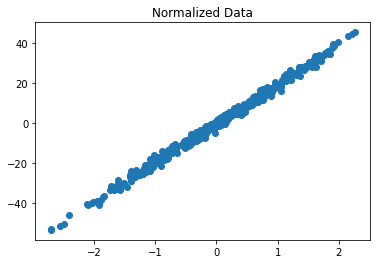

In [12]:
#Visualize
plt.figure()
plt.scatter(X,Y)
plt.title("Normalized Data")
plt.show()

Now we need to find theta=[theta0, theta1] using the following formulae
- $ \theta_{} = (X^TX)^{-1}X^TY$

In [13]:
# We need to add one dummy feature into X, st the dimensions of X and theta matrix becomes suitable for multiplication

ones = np.ones((X.shape[0],1))

X_ = np.hstack((ones,X)) #X_ is X added with one dummy feature
print(X_.shape)
print(X_[:5,:])

(400, 2)
[[ 1.         -0.86881353]
 [ 1.          1.04796658]
 [ 1.         -0.2019676 ]
 [ 1.         -0.34017061]
 [ 1.          0.13317349]]


- $ \theta_{} = (X^TX)^{-1}X^TY$

In [14]:
def predict(X,theta):
    return np.dot(X,theta)

def getThetaClosedForm(X,Y):
    # Y = np.mat(Y)
    firstPart = np.dot(X.T,X)
    secondPart = np.dot(X.T,Y)
    theta = np.dot(np.linalg.pinv(firstPart),secondPart)
    return theta

In [15]:
theta = getThetaClosedForm(X_,Y)

In [16]:
theta

array([[-0.26770624],
       [19.46796097]])

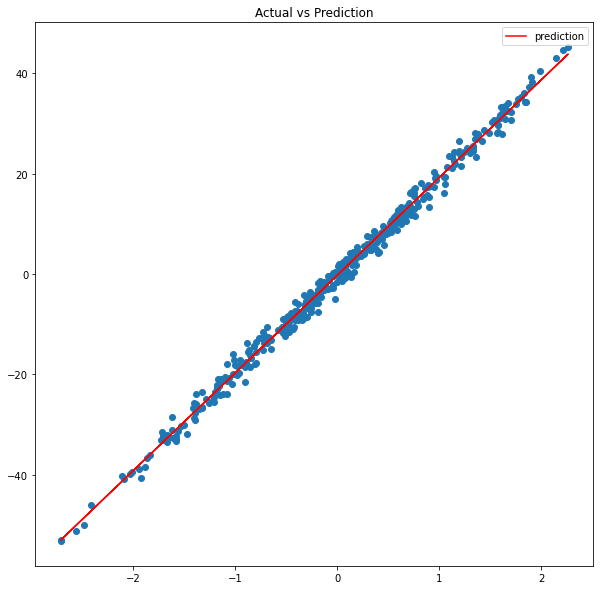

In [17]:
#Visualize
plt.figure(figsize=(10,10))
plt.scatter(X,Y)
plt.plot(X,predict(X_,theta),color = 'red',label = 'prediction')
plt.title("Actual vs Prediction")
plt.legend()
plt.show()

In [18]:
def r2_score(Y,Y_):
    #broadcasting will happen here
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = (1 - num/denom)
    return score*100

In [19]:
Y_ = predict(X_,theta)
r2_score(Y,Y_)

99.45739953772268